In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('House Prediction Data.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [4]:
df.shape

(2919, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
# remove identifiers
df = df.drop('Id', axis=1)

1. Data preprocessing

In [7]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
df = pd.get_dummies(df, columns = 
                    ['MSZoning','Street', 'Alley', 'LotShape', 'LandContour',
                       'Utilities','LotConfig', 'LandSlope', 'Neighborhood',
                       'Condition1','Condition2', 'BldgType', 'HouseStyle', 
                       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                      'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
                       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                      'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                      'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 
                      'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
                      'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
                      'SaleCondition'], drop_first = True)

In [9]:
df = df.dropna()

In [10]:
X = df.drop('SalePrice', axis = 1)

2. Outlier Analysis

In [11]:
# Z score
from scipy.stats import zscore
df['Zscore_SP'] = zscore(df.SalePrice)
df[(df.Zscore_SP > 2.5) | (df.Zscore_SP < -2.5)]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Zscore_SP
58,60,66.0,13682,10,5,2006,2006,1031.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,3.052885
161,60,110.0,13688,9,5,2003,2004,664.0,1016.0,0.0,...,0,0,0,1,0,0,0,1,0,2.736114
178,20,63.0,17423,9,5,2008,2009,748.0,1904.0,0.0,...,0,1,0,0,0,0,0,0,1,3.812955
185,75,90.0,22950,10,9,1892,1993,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,3.489470
231,60,174.0,15138,8,5,1995,1996,506.0,689.0,0.0,...,0,0,0,1,0,0,0,1,0,2.621604
278,20,107.0,14450,9,5,2006,2007,315.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,2.769840
349,60,56.0,20431,9,5,2005,2006,870.0,1410.0,0.0,...,0,1,0,0,0,0,0,0,1,3.033286
378,20,88.0,11394,9,2,2010,2010,350.0,1445.0,0.0,...,0,1,0,0,0,0,0,0,1,2.518328
389,60,96.0,12474,10,5,2007,2008,272.0,1280.0,0.0,...,0,1,0,0,0,0,0,0,1,2.898839
440,20,105.0,15431,10,5,2008,2008,200.0,1767.0,539.0,...,0,0,0,1,0,0,0,1,0,4.453765


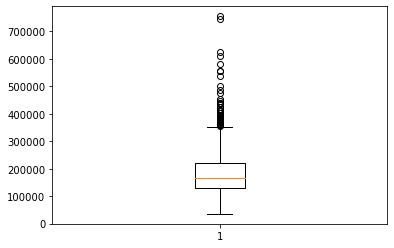

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(df['SalePrice']);  # circles represent outliers

3. Multi-colinearity

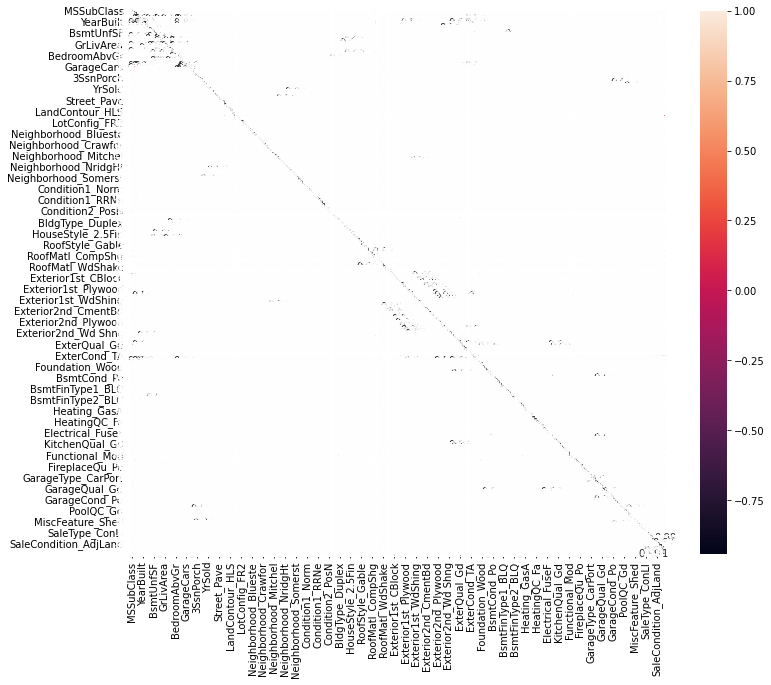

In [13]:
plt.figure(figsize = (12,10))
sns.heatmap(X.corr(), annot = True); # >0.7 should be investigated

4. Linear Regression Analysis

In [14]:
import statsmodels.api as sm
X = sm.add_constant(X)
y = df['SalePrice']

C:\Users\31027\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
import sklearn
from sklearn.model_selection import train_test_split

In [16]:
train_X, test_X, train_y,test_y = train_test_split(X, y, test_size = .2,
                                                  random_state = 521)

In [17]:
Model_1 = sm.OLS(train_y, train_X).fit()

In [18]:
Model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
=========================================================================================
Model:                      OLS                     Adj. R-squared:            0.917     
Dependent Variable:         SalePrice               AIC:                       20760.9481
Date:                       2022-08-12 05:56        BIC:                       21854.8785
No. Observations:           896                     Log-Likelihood:            -10152.   
Df Model:                   227                     F-statistic:               44.53     
Df Residuals:               668                     Prob (F-statistic):        3.98e-299 
R-squared:                  0.938                   Scale:                     5.4568e+08
-----------------------------------------------------------------------------------------
                         Coef.       Std.Err.      t    P>|t|      [0.025       0.975]   
-----------------------------------------------------------------------------------------
const                 -692256.7647 1013012.9625 -0.6834 0.4946 -2681329.6207 1296816.0912
MSSubClass                -46.3062     147.7924 -0.3133 0.7541     -336.4997     243.8874
LotFrontage                47.1805      65.9125  0.7158 0.4744      -82.2402     176.6012
LotArea                     0.5729       0.1726  3.3192 0.0010        0.2340       0.9117
OverallQual              6686.6188    1532.8380  4.3622 0.0000     3676.8583    9696.3793
OverallCond              6725.5416    1296.0687  5.1892 0.0000     4180.6826    9270.4006
YearBuilt                 368.7929     124.9372  2.9518 0.0033      123.4759     614.1098
YearRemodAdd               97.3651      85.0942  1.1442 0.2529      -69.7193     264.4494
MasVnrArea                  9.9276       8.0661  1.2308 0.2188       -5.9104      25.7656
BsmtFinSF1                 11.7142       3.9674  2.9526 0.0033        3.9240      19.5043
BsmtFinSF2                 12.4529       7.7364  1.6096 0.1079       -2.7377      27.6436
BsmtUnfSF                  -5.3568       3.8803 -1.3805 0.1679      -12.9758       2.2622
TotalBsmtSF                18.8103       4.8273  3.8967 0.0001        9.3319      28.2888
1stFlrSF                   44.9212      12.0943  3.7142 0.0002       21.1737      68.6687
2ndFlrSF                   55.4974      10.1637  5.4603 0.0000       35.5407      75.4541
LowQualFinSF              -94.3322      29.8653 -3.1586 0.0017     -152.9734     -35.6910
GrLivArea                   6.0864      11.0344  0.5516 0.5814      -15.5799      27.7527
BsmtFullBath             2297.5769    2728.4031  0.8421 0.4000    -3059.7016    7654.8553
BsmtHalfBath              429.3279    4181.8339  0.1027 0.9183    -7781.7934    8640.4492
FullBath                 2521.0669    3273.9046  0.7700 0.4415    -3907.3156    8949.4494
HalfBath                  -67.8817    2958.9137 -0.0229 0.9817    -5877.7728    5742.0095
BedroomAbvGr            -2057.5603    2047.0677 -1.0051 0.3152    -6077.0219    1961.9013
KitchenAbvGr            -9525.8376    9333.2800 -1.0206 0.3078   -27851.9346    8800.2594
TotRmsAbvGrd              264.6777    1346.0916  0.1966 0.8442    -2378.4022    2907.7576
Fireplaces               8425.4461    3333.2715  2.5277 0.0117     1880.4955   14970.3968
GarageYrBlt                40.8300      87.6408  0.4659 0.6415     -131.2547     212.9146
GarageCars               6530.0022    3031.6058  2.1540 0.0316      577.3785   12482.6258
GarageArea                  9.6850      10.5639  0.9168 0.3596      -11.0575      30.4275
WoodDeckSF                 10.5266       8.2433  1.2770 0.2020       -5.6593      26.7125
OpenPorchSF                 3.3208      17.1484  0.1937 0.8465      -30.3504      36.9921
EnclosedPorch             -11.0136      18.3792 -0.5992 0.5492      -47.1016      25.0743
3SsnPorch                  82.6581      33.1714  2.4918 0.0129       17.5253     147.7908
ScreenPorch         

In [19]:
sig_var = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
          'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'Fireplaces',
          'GarageCars', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold',
            'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave',
           'LandContour_HLS', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
          'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm',
          'Condition2_PosN', 'Condition2_RRAe', 'RoofMatl_Metal', 'ExterQual_Gd',
          'ExterQual_TA', 'ExterCond_Po', 'Foundation_Wood', 'BsmtExposure_Gd',
          'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev', 'FireplaceQu_TA',
          'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA',
          'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA',
          'PoolQC_Fa', 'PoolQC_Gd', 'SaleCondition_Normal']

In [20]:
train_X = train_X[sig_var]

In [21]:
Model_2 = sm.OLS(train_y, train_X).fit()

In [22]:
Model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
======================================================================================
Model:                    OLS                Adj. R-squared (uncentered):   0.981     
Dependent Variable:       SalePrice          AIC:                           20907.9834
Date:                     2022-08-12 05:56   BIC:                           21119.0928
No. Observations:         896                Log-Likelihood:                -10410.   
Df Model:                 44                 F-statistic:                   1062.     
Df Residuals:             852                Prob (F-statistic):            0.00      
R-squared (uncentered):   0.982              Scale:                         7.6018e+08
--------------------------------------------------------------------------------------
                        Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------------
LotArea                    0.6543     0.1203   5.4412 0.0000       0.4183       0.8904
OverallQual            12073.3624  1313.3005   9.1931 0.0000    9495.6788   14651.0459
OverallCond             5383.5352   934.1653   5.7629 0.0000    3550.0001    7217.0703
YearBuilt                  8.6010    16.0788   0.5349 0.5928     -22.9578      40.1598
BsmtFinSF1                19.3964     2.6035   7.4503 0.0000      14.2865      24.5063
TotalBsmtSF               18.3372     4.3356   4.2295 0.0000       9.8276      26.8469
1stFlrSF                  46.6187     4.8398   9.6324 0.0000      37.1194      56.1180
2ndFlrSF                  48.3164     2.9100  16.6036 0.0000      42.6048      54.0280
LowQualFinSF             -84.3862    30.1885  -2.7953 0.0053    -143.6387     -25.1336
Fireplaces              4844.1815  1995.3026   2.4278 0.0154     927.8969    8760.4661
GarageCars             13071.7033  2006.2794   6.5154 0.0000    9133.8739   17009.5326
3SsnPorch                 47.0068    36.0803   1.3028 0.1930     -23.8099     117.8234
ScreenPorch               26.6446    16.9241   1.5744 0.1158      -6.5733      59.8624
PoolArea                 213.8381    39.9767   5.3491 0.0000     135.3738     292.3024
MoSold                  -625.2258   360.5421  -1.7341 0.0833   -1332.8806      82.4290
MSZoning_FV            40693.2777  8924.8344   4.5596 0.0000   23176.0391   58210.5163
MSZoning_RL            22520.2674  7348.2421   3.0647 0.0022    8097.4887   36943.0460
MSZoning_RM             5445.5145  7509.9946   0.7251 0.4686   -9294.7441   20185.7731
Street_Pave            47965.7971 15295.2905   3.1360 0.0018   17944.9315   77986.6628
LandContour_HLS        13054.8075  5259.4729   2.4822 0.0133    2731.7653   23377.8496
Neighborhood_Edwards  -11214.7044  3891.4578  -2.8819 0.0041  -18852.6719   -3576.7370
Neighborhood_NoRidge   44096.1415  6189.8185   7.1240 0.0000   31947.0615   56245.2216
Neighborhood_NridgHt   31716.7184  4802.5434   6.6042 0.0000   22290.5156   41142.9211
Neighborhood_StoneBr   45337.1042  7425.8149   6.1053 0.0000   30762.0695   59912.1390
Condition1_Norm        11872.0112  2826.0292   4.2010 0.0000    6325.2160   17418.8064
Condition2_PosN      -188931.6376 20912.2138  -9.0345 0.0000 -229977.1319 -147886.1433
Condition2_RRAe            0.0000     0.0000   2.4415 0.0148       0.0000       0.0000
RoofMatl_Metal            -0.0000     0.0000  -2.3321 0.0199      -0.0000      -0.0000
ExterQual_Gd          -41441.8063  5721.5568  -7.2431 0.0000  -52671.8046  -30211.8080
ExterQual_TA          -50943.3486  6279.5586  -8.1126 0.0000  -63268.5662  -38618.1310
ExterCond_Po               0.0000     0.0000   2.6124 0.0091       0.0000       0.0000
Foundation_Wood       -35145.9115 20587.1639  -1.7072 0.0882  -75553.4134    5261.5903
BsmtExposure_Gd        19422.3023  3964.0946   4.8996 0.0000   11641.7669   27202.8378
KitchenQual_Gd        -18498.8669  3947.2839  -4.6865 0.0000  -2

In [23]:
sig_var2 = ['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
          'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'Fireplaces',
          'GarageCars', 'PoolArea', 'MSZoning_FV', 'MSZoning_RL', 'Street_Pave',
           'LandContour_HLS', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
          'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm',
          'Condition2_PosN', 'Condition2_RRAe', 'RoofMatl_Metal', 'ExterQual_Gd',
          'ExterQual_TA', 'ExterCond_Po', 'BsmtExposure_Gd',
          'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_TA',
          'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA',
          'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_TA',
          'PoolQC_Fa', 'PoolQC_Gd']

In [24]:
train_X = train_X[sig_var2]

In [25]:
Model_3 = sm.OLS(train_y, train_X).fit()

In [26]:
Model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
======================================================================================
Model:                    OLS                Adj. R-squared (uncentered):   0.981     
Dependent Variable:       SalePrice          AIC:                           20912.4602
Date:                     2022-08-12 05:56   BIC:                           21085.1861
No. Observations:         896                Log-Likelihood:                -10420.   
Df Model:                 36                 F-statistic:                   1280.     
Df Residuals:             860                Prob (F-statistic):            0.00      
R-squared (uncentered):   0.982              Scale:                         7.7052e+08
--------------------------------------------------------------------------------------
                        Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------------
LotArea                    0.6512     0.1208   5.3887 0.0000       0.4140       0.8884
OverallQual            12356.8224  1281.6338   9.6415 0.0000    9841.3260   14872.3188
OverallCond             5856.0567   911.7394   6.4230 0.0000    4066.5619    7645.5515
BsmtFinSF1                18.8649     2.6075   7.2349 0.0000      13.7471      23.9826
TotalBsmtSF               19.6799     4.3317   4.5432 0.0000      11.1779      28.1819
1stFlrSF                  46.6954     4.8478   9.6323 0.0000      37.1805      56.2102
2ndFlrSF                  48.1250     2.8961  16.6174 0.0000      42.4408      53.8092
LowQualFinSF             -51.9966    27.4965  -1.8910 0.0590    -105.9648       1.9716
Fireplaces              5068.8813  1993.0148   2.5433 0.0112    1157.1388    8980.6237
GarageCars             13869.6157  1980.4963   7.0031 0.0000    9982.4436   17756.7878
PoolArea                 206.8109    39.5523   5.2288 0.0000     129.1805     284.4413
MSZoning_FV            36503.9107  5758.4053   6.3392 0.0000   25201.7374   47806.0840
MSZoning_RL            17349.6564  2814.6812   6.1640 0.0000   11825.2077   22874.1051
Street_Pave            61040.4993 13680.0528   4.4620 0.0000   34190.3005   87890.6982
LandContour_HLS        12574.2665  5207.6189   2.4146 0.0160    2353.1360   22795.3969
Neighborhood_Edwards   -9932.1856  3900.2658  -2.5465 0.0111  -17587.3397   -2277.0315
Neighborhood_NoRidge   43009.1707  6217.4871   6.9175 0.0000   30805.9455   55212.3960
Neighborhood_NridgHt   31286.8768  4818.3327   6.4933 0.0000   21829.8086   40743.9449
Neighborhood_StoneBr   45525.2157  7456.3260   6.1056 0.0000   30890.4889   60159.9425
Condition1_Norm        11629.2605  2817.1382   4.1280 0.0000    6099.9893   17158.5317
Condition2_PosN      -191160.0582 20945.0590  -9.1267 0.0000 -232269.4755 -150050.6409
Condition2_RRAe            0.0000     0.0000   7.1525 0.0000       0.0000       0.0000
RoofMatl_Metal             0.0000     0.0000   7.1037 0.0000       0.0000       0.0000
ExterQual_Gd          -41516.3955  5682.2444  -7.3063 0.0000  -52669.0859  -30363.7051
ExterQual_TA          -50549.5637  6236.9947  -8.1048 0.0000  -62791.0770  -38308.0504
ExterCond_Po               0.0000     0.0000   7.1078 0.0000       0.0000       0.0000
BsmtExposure_Gd        19777.9898  3971.5671   4.9799 0.0000   11982.8907   27573.0888
KitchenQual_Gd        -19098.9904  3936.8243  -4.8514 0.0000  -26825.8988  -11372.0820
KitchenQual_TA        -23795.9411  4210.6956  -5.6513 0.0000  -32060.3840  -15531.4983
FireplaceQu_TA         -5340.9754  2882.3460  -1.8530 0.0642  -10998.2316     316.2808
GarageQual_Fa        -120185.9008 17904.6162  -6.7126 0.0000 -155327.7612  -85044.0403
GarageQual_Gd        -116114.2207 20858.4899  -5.5668 0.0000 -157053.7266  -75174.7148
GarageQual_Po        -104729.8816 20786.3005  -5.0384 0.0000 -145527.6994  -63932.0637
GarageQual_TA        -117547.3901 18293.4572  -6.4257 0.0000 -15

In [27]:
sig_var3 = ['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
          'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'Fireplaces',
          'GarageCars', 'PoolArea', 'MSZoning_FV', 'MSZoning_RL', 'Street_Pave',
           'LandContour_HLS', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
          'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Norm',
          'Condition2_PosN', 'Condition2_RRAe', 'RoofMatl_Metal', 'ExterQual_Gd',
          'ExterQual_TA', 'ExterCond_Po', 'BsmtExposure_Gd',
          'KitchenQual_Gd', 'KitchenQual_TA', 'GarageQual_Fa', 'GarageQual_Gd', 
            'GarageQual_Po', 'GarageQual_TA', 'PoolQC_Fa', 'PoolQC_Gd']

In [28]:
train_X = train_X[sig_var3]

In [29]:
Model_4 = sm.OLS(train_y, train_X).fit()

In [30]:
Model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
======================================================================================
Model:                    OLS                Adj. R-squared (uncentered):   0.981     
Dependent Variable:       SalePrice          AIC:                           20912.3081
Date:                     2022-08-12 05:56   BIC:                           21061.0442
No. Observations:         896                Log-Likelihood:                -10425.   
Df Model:                 31                 F-statistic:                   1478.     
Df Residuals:             865                Prob (F-statistic):            0.00      
R-squared (uncentered):   0.981              Scale:                         7.7453e+08
--------------------------------------------------------------------------------------
                        Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------------
LotArea                    0.6616     0.1207   5.4808 0.0000       0.4247       0.8985
OverallQual            12380.8477  1269.5076   9.7525 0.0000    9889.1721   14872.5232
OverallCond             6040.7433   901.6584   6.6996 0.0000    4271.0491    7810.4376
BsmtFinSF1                18.9409     2.6091   7.2595 0.0000      13.8200      24.0618
TotalBsmtSF               20.5229     4.3241   4.7461 0.0000      12.0359      29.0099
1stFlrSF                  45.8616     4.8356   9.4842 0.0000      36.3707      55.3525
2ndFlrSF                  47.5007     2.8917  16.4266 0.0000      41.8251      53.1762
Fireplaces              3691.0713  1826.5217   2.0208 0.0436     106.1384    7276.0041
GarageCars             13606.9173  1971.4177   6.9021 0.0000    9737.5956   17476.2390
PoolArea                 191.0675    38.4778   4.9657 0.0000     115.5468     266.5882
MSZoning_FV            36648.3164  5768.3640   6.3533 0.0000   25326.6892   47969.9436
MSZoning_RL            17036.3908  2792.7334   6.1003 0.0000   11555.0643   22517.7173
Street_Pave            61829.7342 13518.1691   4.5738 0.0000   35297.4849   88361.9835
LandContour_HLS        13379.8911  5206.4401   2.5699 0.0103    3161.1576   23598.6247
Neighborhood_Edwards   -9587.8115  3896.4109  -2.4607 0.0141  -17235.3373   -1940.2858
Neighborhood_NoRidge   41316.0421  6121.7427   6.7491 0.0000   29300.8349   53331.2493
Neighborhood_NridgHt   32421.6171  4777.2588   6.7867 0.0000   23045.2421   41797.9921
Neighborhood_StoneBr   45479.9923  7472.8658   6.0860 0.0000   30812.9219   60147.0627
Condition1_Norm        11988.5707  2814.2638   4.2599 0.0000    6464.9863   17512.1551
Condition2_PosN      -191032.3555 20997.1373  -9.0980 0.0000 -232243.6526 -149821.0584
Condition2_RRAe            0.0000     0.0000   5.5500 0.0000       0.0000       0.0000
RoofMatl_Metal            -0.0000     0.0000  -5.6334 0.0000      -0.0000      -0.0000
ExterQual_Gd          -42647.2755  5669.5984  -7.5221 0.0000  -53775.0544  -31519.4966
ExterQual_TA          -52062.5536  6213.2815  -8.3792 0.0000  -64257.4250  -39867.6823
ExterCond_Po              -0.0000     0.0000  -3.6896 0.0002      -0.0000      -0.0000
BsmtExposure_Gd        19838.9977  3976.7509   4.9887 0.0000   12033.7880   27644.2075
KitchenQual_Gd        -19122.7117  3926.9424  -4.8696 0.0000  -26830.1618  -11415.2616
KitchenQual_TA        -24299.8238  4170.6120  -5.8264 0.0000  -32485.5268  -16114.1209
GarageQual_Fa         -95236.6493 13510.9846  -7.0488 0.0000 -121754.7977  -68718.5010
GarageQual_Gd         -87437.1811 16024.4757  -5.4565 0.0000 -118888.5842  -55985.7781
GarageQual_Po        -104602.5652 20359.9215  -5.1377 0.0000 -144563.1922  -64641.9382
GarageQual_TA         -87672.4807 12738.3092  -6.8826 0.0000 -112674.0910  -62670.8703
PoolQC_Fa            -116886.3082 37560.0282  -3.1120 0.0019 -190605.7613  -43166.8551
PoolQC_Gd            -660329.9872 36772.9937 -17.9569 0.0000 -73

5. Model Validation

In [31]:
def get_standard_values(vals):
    return (vals - vals.mean()) / vals.std()

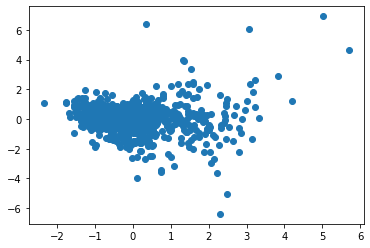

In [32]:
plt.scatter(get_standard_values(Model_4.fittedvalues),
            get_standard_values(Model_4.resid));

6. Prediction

In [33]:
pred = Model_4.predict(test_X[sig_var3])
pred

183     191219.708339
1046    381175.153905
1142    325404.065880
349     430141.117040
29       52609.222113
            ...      
653     130843.055820
571     126182.042716
25      262528.224376
1051    183942.222071
644     353483.275709
Length: 225, dtype: float64

In [34]:
# Measuring RMSE
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred, test_y))

50441.70871721007

In [35]:
# Measuring R2
np.round(metrics.r2_score(pred, test_y))

1.0

C:\Users\31027\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


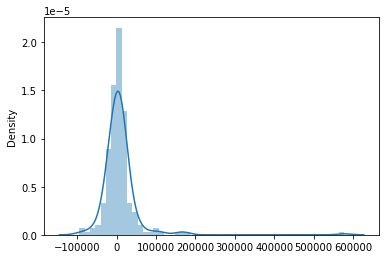

In [36]:
# dist plot
sns.distplot(test_y - pred);

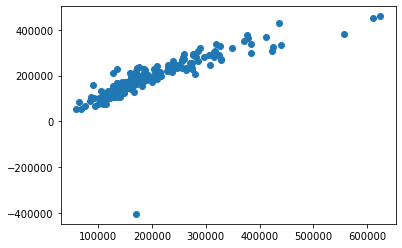

In [37]:
plt.scatter(test_y, pred); 